# Entregable 3: Archivo Respuestas - Preguntas Datos Blind Test

## Lectura de archivo: Producción de Crudo de 2018 a 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Leer archivo .xlsx con datos de produccion: 2017 a 2019 (Archivo de salida del entregable 1: archivo lectura de datos)
df_2017_2019_blind = pd.read_excel('Datos_salida/Produccion_Fiscalizada_Crudo_Blind_2017-2019.xlsx')

In [2]:
# produccion de 2017 a 2019
df_2017_2019_blind.head(10)

,departamento,municipio,operadora,contrato,campo,año,mes,produccion
0,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,2019,ene,7897.993261
1,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,9ac1420f,2019,ene,134.214677
2,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,9b395bc9,2019,ene,322.628507
3,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,254d7db5,2019,ene,40.170881
4,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,2f614c0b,2019,ene,22890.888398
5,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,043b305e,2019,ene,3514.332254
6,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,fca93f9e,2019,ene,26.349227
7,cf33cb8a,102a28a6,d5580f74,1f d2689f,13276557,2019,ene,205.780613
8,cf33cb8a,102a28a6,d5580f74,1f d2689f,c220f014,2019,ene,1252.898684
9,cf33cb8a,102a28a6,d5580f74,1f d2689f,1fd2689f,2019,ene,128.385875


## Pregunta 6

In [3]:
# ** Caudal de produccion del Campo "1F D2689F" por mes (2019) **

query6 = df_2017_2019_blind.loc[(df_2017_2019_blind['año'] == 2019)].groupby(['campo','mes'],as_index = False).sum() # Produccion en 2019 (todos los campos)
query6 = query6[query6['campo'].isin(['1f d2689f','1fd2689f','1f-d2689f'])].groupby(['mes','año'],as_index = False).sum() # Produccion en 2019 (campo "1F D2689F")

# ordenar por meses
meses_orden ={'ene':31,'feb':28,'mar':31,'abr':30,'may':31,'jun':30,'jul':31,'ago':31,'sep':30,'oct':31,'nov':30,'dic':31}
query6['mes'] = pd.Categorical(query6['mes'], meses_orden.keys())
query6.sort_values('mes',inplace = True)
query6.reset_index(drop = True, inplace = True)

query6['dias'] = query6['mes'].map(meses_orden) # anadir columna con numero de dias por mes
query6['caudal'] = query6['produccion']/query6['dias'] #Calcular Caudal por mes

print('Caudal de produccion del Campo "1F D2689F" por mes (2019):')
query6

Caudal de produccion del Campo "1F D2689F" por mes (2019):


,mes,año,produccion,dias,caudal
0,ene,2019,8026.379137,31,258.915456
1,feb,2019,6834.356628,28,244.084165
2,mar,2019,6324.793241,31,204.025588
3,abr,2019,6116.217848,30,203.873928
4,may,2019,5935.231390,31,191.459077
5,jun,2019,6487.956181,30,216.265206
6,jul,2019,4819.418285,31,155.465106
7,ago,2019,5958.176858,31,192.199253
8,sep,2019,5255.556174,30,175.185206
9,oct,2019,6024.164109,31,194.327874


In [4]:
# Filtrar: Produccion en Julio de 2019
Q_produccion = query6.loc[query6['mes'] == 'jul']['caudal'].values[0]

print('Respuesta - Pregunta 6:\n')
print('\nCauldal de produccion del Campo "1F D2689F" (Julio 2019):',round(Q_produccion,2),'[bppd]\n')

Respuesta - Pregunta 6:


Cauldal de produccion del Campo "1F D2689F" (Julio 2019): 155.47 [bppd]



Grafico - Pregunta 6:



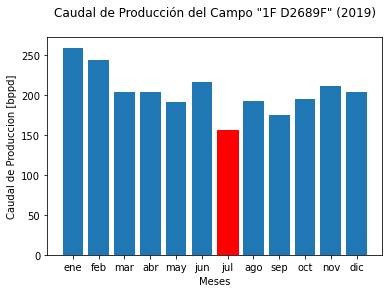

In [5]:
# Grafica - Pregunta 6:

## Grafica de barras: Caudal del campo "1F D2689F" por mes en 2019
bar_list = plt.bar(query6['mes'].values,query6['caudal'].values) 
bar_list[6].set_color('r')
plt.xticks(query6['mes'].values,fontsize = 10)
plt.xlabel('Meses')
plt.ylabel('Caudal de Produccion [bppd]')
plt.title('Caudal de Producción del Campo "1F D2689F" (2019)\n')

# Respuesta - Pregunta 6
print('Grafico - Pregunta 6:\n')
plt.show()

## Pregunta 7

In [6]:
# *** Barriles Producidos por la Operadora "2FE52430" por mes (2019) ***

query7 = df_2017_2019_blind.loc[(df_2017_2019_blind['año'] == 2019)].groupby(['operadora','mes','año'],as_index = False).sum() # Produccion en 2019 (todos las operadoras)
query7 = query7[query7['operadora'].isin(['2fe52430'])].groupby(['mes','año'],as_index = False).sum() # Produccion en 2019 (operadora "2FE52430")

# ordenar por meses
meses_orden ={'ene':31,'feb':28,'mar':31,'abr':30,'may':31,'jun':30,'jul':31,'ago':31,'sep':30,'oct':31,'nov':30,'dic':31}
query7['mes'] = pd.Categorical(query7['mes'], meses_orden.keys())
query7.sort_values('mes',inplace = True)
query7.reset_index(drop = True, inplace = True)

print('Barriles Producidos por la Operadora "2FE52430" por mes (2019):')
query7

Barriles Producidos por la Operadora "2FE52430" por mes (2019):


,mes,año,produccion
0,ene,2019,7585.195419
1,feb,2019,7452.220450
2,mar,2019,7694.006962
3,abr,2019,7661.948554
4,may,2019,7832.321374
5,jun,2019,5272.020363
6,jul,2019,7913.272115
7,ago,2019,6966.255009
8,sep,2019,7302.313683
9,oct,2019,7987.806826


In [7]:
# Filtrar Produccion en Febrero de 2019
Barriles_produccion = query7.loc[query7['mes'] == 'feb']['produccion'].values[0]

print('Respuesta - Pregunta 7:\n')
print('\nBarriles Producidos por la Operadora "2FE52430" (Febrero 2019):',round(Barriles_produccion,2),'[barriles]\n')

Respuesta - Pregunta 7:


Barriles Producidos por la Operadora "2FE52430" (Febrero 2019): 7452.22 [barriles]



Grafico - Pregunta 7:



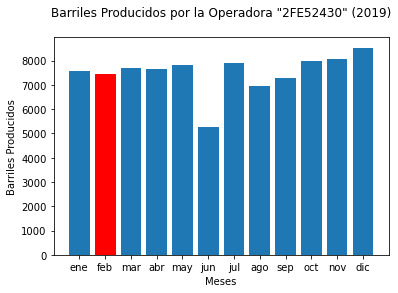

In [8]:
# Grafica - Pregunta 7:

# Grafica de barras: Produccion de la Operadora "2FE52430" en 2019
bar_list = plt.bar(query7['mes'].values,query7['produccion'].values)
bar_list[1].set_color('r')
plt.xticks(query7['mes'].values,fontsize = 10)
plt.xlabel('Meses')
plt.ylabel('Barriles Producidos')
plt.title('Barriles Producidos por la Operadora "2FE52430" (2019)\n')

# Pregunta 7
print('Grafico - Pregunta 7:\n')
plt.show()

## Pregunta 8

In [9]:
# Filtrar Produccion por Departamento en 2018
query8 = df_2017_2019_blind.loc[(df_2017_2019_blind['año'] == 2018)].groupby(['departamento','año'],as_index = False).sum()
print('Respuesta - Pregunta 8:\n')
print('Produccion [barriles] por Departamento en 2018:')
query8

Respuesta - Pregunta 8:

Produccion [barriles] por Departamento en 2018:


,departamento,año,produccion
0,0fa93c9b,2018,98767.669386
1,cf33cb8a,2018,623608.432526
2,f7fd2c4f,2018,126069.165338


Grafico - Pregunta 8:



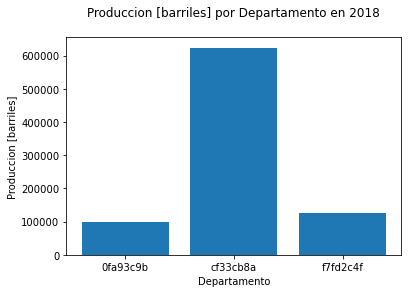

In [10]:
## ** Grafica - Pregunta 8 ***

# Grafica de Barras: Produccion por Departamento en 2018
plt.bar(query8['departamento'].values,query8['produccion'].values)
plt.xlabel('Departamento')
plt.ylabel('Produccion [barriles]')
plt.title('Produccion [barriles] por Departamento en 2018\n')
print('Grafico - Pregunta 8:\n')
plt.show()

## Pregunta 9

### Año 2019

In [11]:
## *** Produccion por Departamento (año 2019) ***

# Calcular indicadores estadisticos (mean, std, min, max) para cada campo en cada departamento (2019)
query9_19 = df_2017_2019_blind.loc[df_2017_2019_blind['año'] == 2019].drop('año',axis = 1).groupby(['departamento','campo']).describe() 

# Ordenar produccion en funcion de la desviacion estandar (std: medida de la variabilidad de la produccion)
# Para cada departamento, y para cada uno de los campos dentro de cada departamento
query9_19 = query9_19.sort_values(['departamento',('produccion','std')],ascending = [True,False])

# Datos de Produccion ordenados en funcion de 'STD' y agrupados por Departamento, Campo.
produccion2019_departamento_ordenado = query9_19.drop([('produccion','count'),('produccion','25%'),('produccion','50%'),('produccion','75%')], axis = 1) # eliminar columnas de percentiles


In [12]:
# Respuesta: Pregunta 9:

# Se muestra el top 5 (de mayor a menor) de campos con produccion mas variable (promedio y desv. std.) en 2019 
dep_top_campos = produccion2019_departamento_ordenado.groupby('departamento',as_index = False).apply(lambda grp: grp.nlargest(5, columns=('produccion', 'std')))

# Reordenar columnas - estadistica: 'std', 'mean', 'min', 'max'
dep_top_campos = dep_top_campos[[('produccion', 'std'),('produccion', 'mean'),('produccion', 'min'),('produccion', 'max')]] 
# Renombras columnas - estadisca de Produccion por Campo, por Departamento
dep_top_campos = dep_top_campos.rename(columns = {'produccion': 'PRODUCCION (barriles)','std':'variacion (sigma)','mean':'promedio'}).round(2)

print('Respuesta - Pregunta 9:\n')
print('Top 5: Campos con Produccion más variable  por Departamento (año: 2019)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
print('\n')
dep_top_campos

Respuesta - Pregunta 9:

Top 5: Campos con Produccion más variable  por Departamento (año: 2019)

Se muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento




PRODUCCION (barriles)                             
                            variacion (sigma)  promedio      min       max
  departamento campo                                                      
0 0fa93c9b     48670499                714.44   5611.14  3690.82   6564.69
               373ebdec                241.70    874.14   382.75   1128.16
               e32e23a1                 59.33    479.04   361.40    567.29
1 657b6154     8568d01e                205.57    199.79     0.00    609.26
               11e586b4                178.20     95.08     0.00    548.67
2 cf33cb8a     2f614c0b              12042.72  12458.86   150.64  25999.98
               5559f8d7               1327.00   4272.45  2458.23   6059.66
               fd6f6562               1194.10   3378.71   869.76   4814.22
               febb6cf6                833.66   4149.94  2471.14   5827.82
               d56beadb                810.84    474.83     0.00   2283.47
3 ec12ad00     44502c89                 11.47     15.02     0.00     29.24
               5558f26e                  0.96      1.11     0.00      2.76
               85c1a0e5                  0.43      0.12     0.00      1.47
4 f7fd2c4f     8dd7c41b               1076.94   4714.70  3091.02   6378.55
               82edafb9                841.51   1851.29   675.81   3006.48
               58a0d8ca                347.90   1768.15  1033.46   2242.54
               8ba362f3                231.49    257.92     0.00    497.92
               4f4a249f                 80.30    192.81   129.19    356.44

In [13]:
#  *** Obtener el Top 5 de Campos con mayor variabilidad para cada Departamento (2019) ***

top = 5 #top 5 

# Obtener nombre de los departamentos
departamentos = np.array(produccion2019_departamento_ordenado.index.get_level_values(0))
departamentos = np.unique(departamentos)
print('Nombre de los departamentos (2019): ',departamentos, '\n')
print('Numero de departamentos con produccion en 2019: ',len(departamentos), '\n')

# Obtener Produccion Promedio y Desv. Estandar 
## Inicializar dos matrices: para almacenar promedios y desviaciones para el top 5 de campos en cada departamento 
dep_std_values = np.zeros((len(departamentos),top))
dep_mean_values = np.zeros((len(departamentos),top))
i=0

# Iterar sobre cada departamento en el DataFrame: produccion2019_departamento_ordenado (valores promedio y desv. estandar)
for dep in departamentos:
    mean_values = produccion2019_departamento_ordenado.loc[produccion2019_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','mean')].values
    std_values = produccion2019_departamento_ordenado.loc[produccion2019_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','std')].values
    if (len(std_values) >= top): # Tomar el Top 5 de campos para el departamento
        dep_std_values[i,:] = std_values[0:top]
        dep_mean_values[i,:] = mean_values[0:top] 
    else: # rellenar con 0 si el departamento tiene menos de 5 campos 
        dep_std_values[i,:] = np.pad(std_values,(0,top-len(std_values)))
        dep_mean_values[i,:] = np.pad(mean_values,(0,top-len(std_values)))
    i += 1
   

Nombre de los departamentos (2019):  ['0fa93c9b' '657b6154' 'cf33cb8a' 'ec12ad00' 'f7fd2c4f'] 

Numero de departamentos con produccion en 2019:  5 



In [14]:
# Guardar Variacion (desv. estandar) y Nombre de los departamentos
# Para grafica Resumen al final

# Valores de variacion
dep1_19_std = dep_std_values[0,:]
dep2_19_std = dep_std_values[1,:]
dep3_19_std = dep_std_values[2,:]
dep4_19_std = dep_std_values[3,:]
dep5_19_std = dep_std_values[4,:]

# Nombres de Departamentos
dep1_19_name = departamentos[0].upper()
dep2_19_name = departamentos[1].upper()
dep3_19_name = departamentos[2].upper()
dep4_19_name = departamentos[3].upper()
dep5_19_name = departamentos[4].upper()


Grafico - Pregunta 9 (2017):



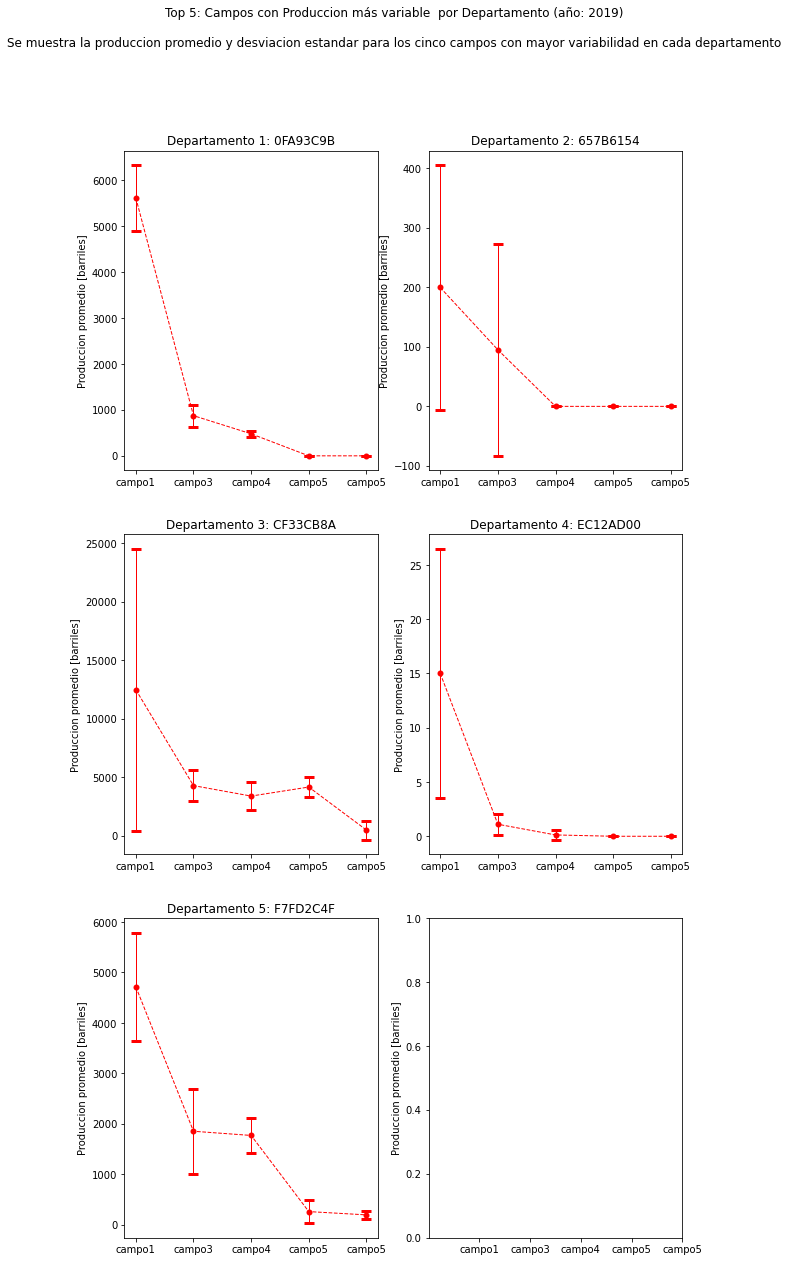

In [15]:
# ** Grafica - Pregunta 9 (2019) **

x = np.array([1, 2, 3, 4, 5])
x_labels = ['campo1','campo3','campo4','campo5','campo5'] # Top5: labels de campos genericos

# Departamento 1
dep1_std = dep_std_values[0,:] # Desv. estandard del Top 5-Campos en el Departamento 1
dep1_mean = dep_mean_values[0,:] # Produccion promedio del Top 5-Campos en el Departamento 1
dep1 = departamentos[0] # Nombre del Departamento 1

# Departamento 2
dep2_std = dep_std_values[1,:] 
dep2_mean = dep_mean_values[1,:]
dep2 = departamentos[1]

# Departamento 3
dep3_std = dep_std_values[2,:] 
dep3_mean = dep_mean_values[2,:]
dep3 = departamentos[2]

# Departamento 4
dep4_std = dep_std_values[3,:] 
dep4_mean = dep_mean_values[3,:]
dep4 = departamentos[3]

# Departamento 5
dep5_std = dep_std_values[4,:] 
dep5_mean = dep_mean_values[4,:]
dep5 = departamentos[4]

## Crear Grafica
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (10,20))
fig.suptitle('Top 5: Campos con Produccion más variable  por Departamento (año: 2019)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
plt.setp(axs, xticks = x, xticklabels=x_labels, ylabel = 'Produccion promedio [barriles]')

# definir tipo de linea
linestyle = {"linestyle":"--", "linewidth":1, "markeredgewidth":3, "elinewidth":1, "capsize":5}

# Departamento 1
axs[0,0].errorbar(x, dep1_mean, dep1_std, color = 'r', marker='.',**linestyle)
axs[0,0].set_title('Departamento 1: '+str(dep1.upper()))

# Departamento 2
axs[0,1].errorbar(x, dep2_mean, dep2_std, color = 'r', marker='.',**linestyle)
axs[0,1].set_title('Departamento 2: '+str(dep2.upper()))

# Departamento 3
axs[1,0].errorbar(x, dep3_mean, dep3_std, color = 'r', marker='.',**linestyle)
axs[1,0].set_title('Departamento 3: '+str(dep3.upper()))

# Departamento 4
axs[1,1].errorbar(x, dep4_mean, dep4_std, color = 'r', marker='.',**linestyle)
axs[1,1].set_title('Departamento 4: '+str(dep4.upper()))

# Departamento 5
axs[2,0].errorbar(x, dep5_mean, dep5_std, color = 'r', marker='.',**linestyle)
axs[2,0].set_title('Departamento 5: '+str(dep5.upper()))

print('Grafico - Pregunta 9 (2017):\n')
plt.show()


### Año 2018

In [16]:
## *** Produccion por Departamento (año 2018) ***

# Calcular indicadores estadisticos (mean, std, min, max) para cada campo en cada departamento (2018)
query9_18 = df_2017_2019_blind.loc[df_2017_2019_blind['año'] == 2018].drop('año',axis = 1).groupby(['departamento','campo']).describe() 

# Ordenar produccion en funcion de la desviacion estandar (std: medida de la variabilidad de la produccion)
# Para cada departamento, y para cada uno de los campos dentro de cada departamento
query9_18 = query9_18.sort_values(['departamento',('produccion','std')],ascending = [True,False])

# Imprimir: Datos de Produccion ordenados en funcion de 'STD'
produccion2018_departamento_ordenado = query9_18.drop([('produccion','count'),('produccion','25%'),('produccion','50%'),('produccion','75%')], axis = 1) # eliminar columnas de percentiles


In [17]:
# Respuesta: Pregunta 9:

# Se muestra el top 5 (de mayor a menor) de campos con produccion mas variable (promedio y desv. std.) en 2018 
dep_top_campos = produccion2018_departamento_ordenado.groupby('departamento',as_index = False).apply(lambda grp: grp.nlargest(5, columns=('produccion', 'std')))

# Reordenar columnas - estadistica: 'std', 'mean', 'min', 'max'
dep_top_campos = dep_top_campos[[('produccion', 'std'),('produccion', 'mean'),('produccion', 'min'),('produccion', 'max')]] 
# Renombras columnas - estadisca de Produccion por Campo, por Departamento
dep_top_campos = dep_top_campos.rename(columns = {'produccion': 'PRODUCCION (barriles)','std':'variacion (sigma)','mean':'promedio'}).round(2)

print('Respuesta - Pregunta 9:\n')
print('Top 5: Campos con Produccion más variable  por Departamento (año: 2018)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
print('\n')
dep_top_campos

Respuesta - Pregunta 9:

Top 5: Campos con Produccion más variable  por Departamento (año: 2018)

Se muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento




PRODUCCION (barriles)                             
                             variacion (sigma)  promedio      min       max
  departamento campo                                                       
0 0fa93c9b     48670499                 437.90   6650.66  5650.96   7463.36
               373ebdec                 171.68    928.53   531.92   1147.43
               e32e23a1                 104.31    651.45   496.17    804.04
1 cf33cb8a     2f614c0b               11683.87  11491.37    38.39  23697.92
               5559f8d7                 976.07   2615.11    14.80   3612.95
               febb6cf6                 556.24   3821.03  3062.59   4491.22
               124207de                 491.56    141.90     0.00   1702.83
               1f-d2689f                394.81   8941.95  8365.19   9630.07
2 f7fd2c4f     8dd7c41b                1685.74   4358.08  2731.53   7545.82
               58a0d8ca                 656.27   1930.77   723.49   2872.11
               82edafb9                 316.28   1612.54  1091.59   2086.93
               51cbb05d                 183.73    604.52   390.43    916.85
               4f4a249f                 153.36    275.44   124.29    498.62

In [18]:
#  *** Obtener el Top 5 de Campos con mayor variabilidad para cada Departamento (2018) ***

top = 5 #top 5 

# Obtener nombre de los departamentos
departamentos = np.array(produccion2018_departamento_ordenado.index.get_level_values(0))
departamentos = np.unique(departamentos)
print('Nombre de los departamentos (2018): ',departamentos, '\n')
print('Numero de departamentos con produccion en 2018: ',len(departamentos), '\n')

# Obtener Produccion Promedio y Desv. Estandar 
## Inicializar dos matrices: para almacenar promedios y desviaciones para el top 5 de campos en cada departamento 
dep_std_values = np.zeros((len(departamentos),top))
dep_mean_values = np.zeros((len(departamentos),top))
i=0

# Iterar sobre cada departamento en el DataFrame: produccion2018_departamento_ordenado (valores promedio y desv. estandar)
for dep in departamentos:
    mean_values = produccion2018_departamento_ordenado.loc[produccion2018_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','mean')].values
    std_values = produccion2018_departamento_ordenado.loc[produccion2018_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','std')].values
    if (len(std_values) >= top): # Tomar el Top 5 de campos para el departamento
        dep_std_values[i,:] = std_values[0:top]
        dep_mean_values[i,:] = mean_values[0:top] 
    else: # rellenar con 0 si el departamento tiene menos de 5 campos 
        dep_std_values[i,:] = np.pad(std_values,(0,top-len(std_values)))
        dep_mean_values[i,:] = np.pad(mean_values,(0,top-len(std_values)))
    i += 1
   


Nombre de los departamentos (2018):  ['0fa93c9b' 'cf33cb8a' 'f7fd2c4f'] 

Numero de departamentos con produccion en 2018:  3 



In [19]:
# Guardar Variacion (desv. estandar) y Nombre de los departamentos
# Para grafica Resumen al final

# Valores de variacion
dep1_18_std = dep_std_values[0,:]
dep2_18_std = dep_std_values[1,:]
dep3_18_std = dep_std_values[2,:]

# Nombres de Departamentos
dep1_18_name = departamentos[0].upper()
dep2_18_name = departamentos[1].upper()
dep3_18_name = departamentos[2].upper()

Grafico - Pregunta 9 (2018):



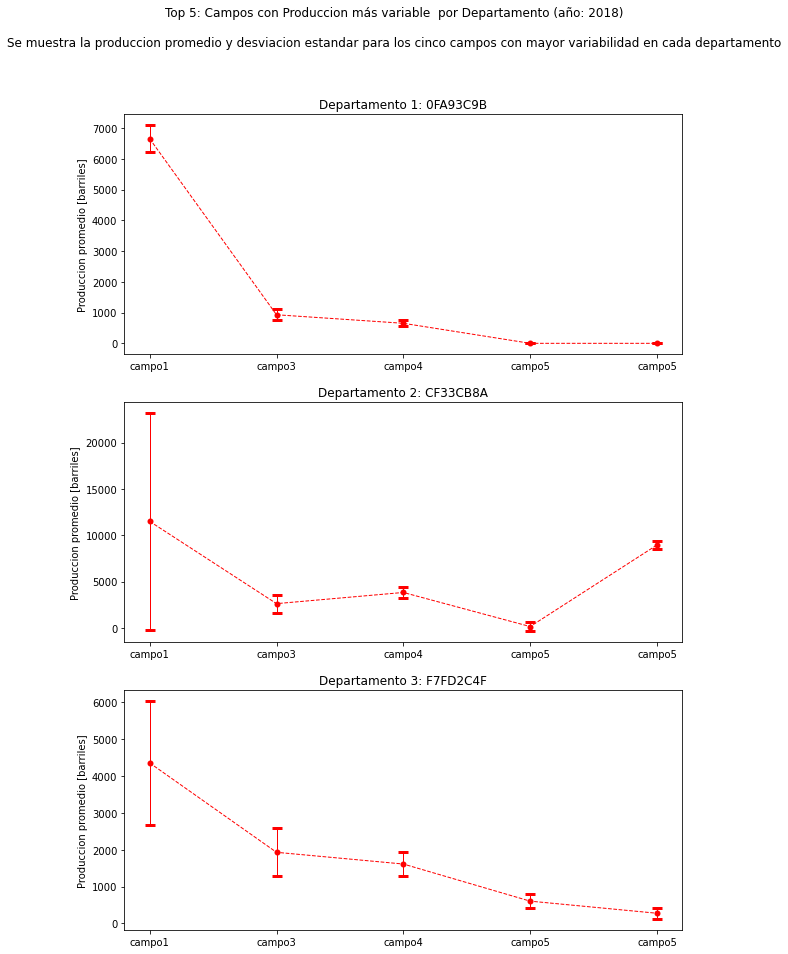

In [20]:
# ** Grafica - Pregunta 9 (2018) **

x = np.array([1, 2, 3, 4, 5])
x_labels = ['campo1','campo3','campo4','campo5','campo5'] # Top5: labels de campos genericos

# Departamento 1
dep1_std = dep_std_values[0,:] # Desv. estandard del Top 5-Campos en el Departamento 1
dep1_mean = dep_mean_values[0,:] # Produccion promedio del Top 5-Campos en el Departamento 1
dep1 = departamentos[0] # Nombre del Departamento 1

# Departamento 2
dep2_std = dep_std_values[1,:] 
dep2_mean = dep_mean_values[1,:]
dep2 = departamentos[1]

# Departamento 3
dep3_std = dep_std_values[2,:] 
dep3_mean = dep_mean_values[2,:]
dep3 = departamentos[2]

## Crear Grafica
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (10,15))
fig.suptitle('Top 5: Campos con Produccion más variable  por Departamento (año: 2018)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
plt.setp(axs, xticks = x, xticklabels=x_labels, ylabel= 'Produccion promedio [barriles]')

# definir tipo de linea
linestyle = {"linestyle":"--", "linewidth":1, "markeredgewidth":3, "elinewidth":1, "capsize":5}

# Departamento 1
axs[0].errorbar(x, dep1_mean, dep1_std, color = 'r', marker='.',**linestyle)
axs[0].set_title('Departamento 1: '+str(dep1.upper()))



# Departamento 2
axs[1].errorbar(x, dep2_mean, dep2_std, color = 'r', marker='.',**linestyle)
axs[1].set_title('Departamento 2: '+str(dep2.upper()))


# Departamento 3
axs[2].errorbar(x, dep3_mean, dep3_std, color = 'r', marker='.',**linestyle)
axs[2].set_title('Departamento 3: '+str(dep3.upper()))


print('Grafico - Pregunta 9 (2018):\n')
plt.show()

### Año 2017

In [21]:
## *** Produccion por Departamento (año 2017) ***

# Calcular indicadores estadisticos (mean, std, min, max) para cada campo en cada departamento (2017)
query9_17 = df_2017_2019_blind.loc[df_2017_2019_blind['año'] == 2017].drop('año',axis = 1).groupby(['departamento','campo']).describe() 

# Ordenar produccion en funcion de la desviacion estandar (std: medida de la variabilidad de la produccion)
# Para cada departamento, y para cada uno de los campos dentro de cada departamento
query9_17 = query9_17.sort_values(['departamento',('produccion','std')],ascending = [True,False])

# Imprimir: Datos de Produccion ordenados en funcion de 'STD'
produccion2017_departamento_ordenado = query9_17.drop([('produccion','count'),('produccion','25%'),('produccion','50%'),('produccion','75%')], axis = 1) # eliminar columnas de percentiles


In [22]:
# Respuesta: Pregunta 9:

# Se muestra el top 5 (de mayor a menor) de campos con produccion mas variable (promedio y desv. std.) en 2017 
dep_top_campos = produccion2017_departamento_ordenado.groupby('departamento',as_index = False).apply(lambda grp: grp.nlargest(5, columns=('produccion', 'std')))

# Reordenar columnas - estadistica: 'std', 'mean', 'min', 'max'
dep_top_campos = dep_top_campos[[('produccion', 'std'),('produccion', 'mean'),('produccion', 'min'),('produccion', 'max')]] 
# Renombras columnas - estadisca de Produccion por Campo, por Departamento
dep_top_campos = dep_top_campos.rename(columns = {'produccion': 'PRODUCCION (barriles)','std':'variacion (sigma)','mean':'promedio'}).round(2)

print('Respuesta - Pregunta 9:\n')
print('Top 5: Campos con Produccion más variable  por Departamento (año: 2017)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
print('\n')
dep_top_campos

Respuesta - Pregunta 9:

Top 5: Campos con Produccion más variable  por Departamento (año: 2017)

Se muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento




PRODUCCION (barriles)                             
                             variacion (sigma)  promedio      min       max
  departamento campo                                                       
0 0fa93c9b     48670499                1365.42   5131.89  3273.19   7167.21
               373ebdec                 120.51    888.39   729.00   1077.76
               e32e23a1                 103.09    927.68   730.81   1107.97
1 5f559ecb     c6ba0174                  34.39     14.58     0.00    102.71
2 cf33cb8a     2f614c0b               11106.26  10137.74     0.00  23340.00
               1f d2689f               2721.06  11290.34  3994.04  14146.30
               c728bf96                1290.01   4109.03   907.29   5555.50
               043b305e                1150.59   3637.37   186.76   4386.09
               febb6cf6                 807.28   3309.97   780.76   3727.61
3 eccb9ef1     27cb99a2                  87.96     29.29     0.00    305.42
4 f7fd2c4f     8dd7c41b                1644.63   2288.77   193.29   4719.80
               58a0d8ca                 966.30   3344.79  1993.21   5043.29
               51cbb05d                 379.02    933.28   498.83   1871.49
               82edafb9                 301.96   1932.90  1579.49   2606.86
               741abe20                 163.49     95.27     0.00    427.06

In [23]:
#  *** Obtener el Top 5 de Campos con mayor variabilidad para cada Departamento (2017) ***

top = 5 #top 5 

# Obtener nombre de los departamentos
departamentos = np.array(produccion2017_departamento_ordenado.index.get_level_values(0))
departamentos = np.unique(departamentos)
print('Nombre de los departamentos (2017): ',departamentos, '\n')
print('Numero de departamentos con produccion en 2017: ',len(departamentos), '\n')

# Obtener Produccion Promedio y Desv. Estandar 
## Inicializar dos matrices: para almacenar promedios y desviaciones para el top 5 de campos en cada departamento 
dep_std_values = np.zeros((len(departamentos),top))
dep_mean_values = np.zeros((len(departamentos),top))
i=0

# Iterar sobre cada departamento en el DataFrame: produccion2017_departamento_ordenado (valores promedio y desv. estandar)
for dep in departamentos:
    mean_values = produccion2017_departamento_ordenado.loc[produccion2017_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','mean')].values
    std_values = produccion2017_departamento_ordenado.loc[produccion2017_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','std')].values
    if (len(std_values) >= top): # Tomar el Top 5 de campos para el departamento
        dep_std_values[i,:] = std_values[0:top]
        dep_mean_values[i,:] = mean_values[0:top] 
    else: # rellenar con 0 si el departamento tiene menos de 5 campos 
        dep_std_values[i,:] = np.pad(std_values,(0,top-len(std_values)))
        dep_mean_values[i,:] = np.pad(mean_values,(0,top-len(std_values)))
    i += 1
    

Nombre de los departamentos (2017):  ['0fa93c9b' '5f559ecb' 'cf33cb8a' 'eccb9ef1' 'f7fd2c4f'] 

Numero de departamentos con produccion en 2017:  5 



In [24]:
# Guardar Variacion (desv. estandar) y Nombre de los departamentos
# Para grafica Resumen al final

# Valores de variacion
dep1_17_std = dep_std_values[0,:]
dep2_17_std = dep_std_values[1,:]
dep3_17_std = dep_std_values[2,:]
dep4_17_std = dep_std_values[3,:]
dep5_17_std = dep_std_values[4,:]

# Nombres de Departamentos
dep1_17_name = departamentos[0].upper()
dep2_17_name = departamentos[1].upper()
dep3_17_name = departamentos[2].upper()
dep4_17_name = departamentos[3].upper()
dep5_17_name = departamentos[4].upper()

Grafico - Pregunta 9 (2017):



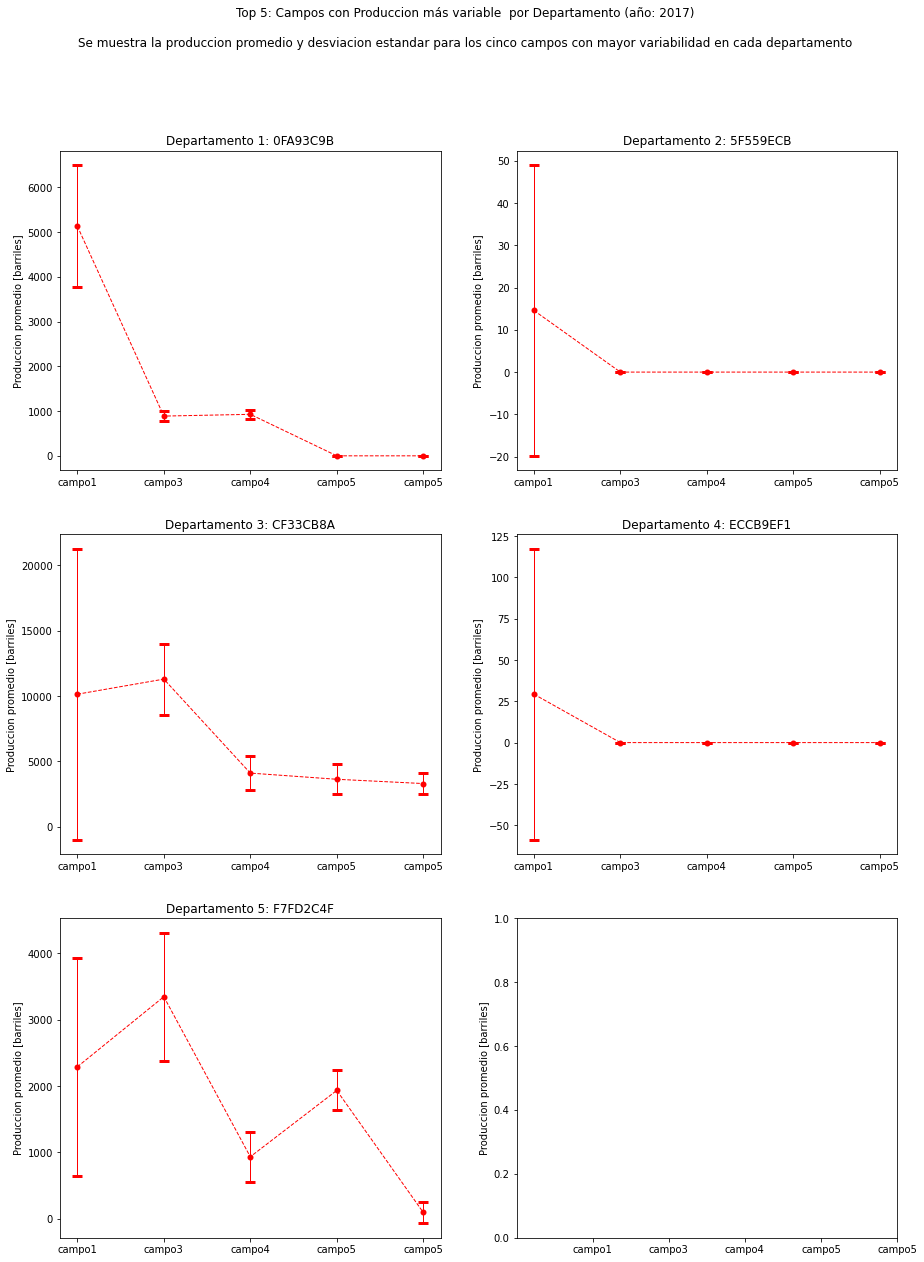

In [25]:
# ** Grafica - Pregunta 9 (2017) **

x = np.array([1, 2, 3, 4, 5])
x_labels = ['campo1','campo3','campo4','campo5','campo5'] # Top5: labels de campos genericos

# Departamento 1
dep1_std = dep_std_values[0,:] # Desv. estandard del Top 5-Campos en el Departamento 1
dep1_mean = dep_mean_values[0,:] # Produccion promedio del Top 5-Campos en el Departamento 1
dep1 = departamentos[0] # Nombre del Departamento 1

# Departamento 2
dep2_std = dep_std_values[1,:] 
dep2_mean = dep_mean_values[1,:]
dep2 = departamentos[1]

# Departamento 3
dep3_std = dep_std_values[2,:] 
dep3_mean = dep_mean_values[2,:]
dep3 = departamentos[2]

# Departamento 4
dep4_std = dep_std_values[3,:] 
dep4_mean = dep_mean_values[3,:]
dep4 = departamentos[3]

# Departamento 5
dep5_std = dep_std_values[4,:] 
dep5_mean = dep_mean_values[4,:]
dep5 = departamentos[4]

## Crear Grafica
fig, axs = plt.subplots(nrows=3, ncols=2,figsize = (15,20))
fig.suptitle('Top 5: Campos con Produccion más variable  por Departamento (año: 2017)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
plt.setp(axs, xticks = x, xticklabels=x_labels, ylabel = 'Produccion promedio [barriles]')

# definir tipo de linea
linestyle = {"linestyle":"--", "linewidth":1, "markeredgewidth":3, "elinewidth":1, "capsize":5}

# Departamento 1
axs[0,0].errorbar(x, dep1_mean, dep1_std, color = 'r', marker='.',**linestyle)
axs[0,0].set_title('Departamento 1: '+str(dep1.upper()))


# Departamento 2
axs[0,1].errorbar(x, dep2_mean, dep2_std, color = 'r', marker='.',**linestyle)
axs[0,1].set_title('Departamento 2: '+str(dep2.upper()))

# Departamento 3
axs[1,0].errorbar(x, dep3_mean, dep3_std, color = 'r', marker='.',**linestyle)
axs[1,0].set_title('Departamento 3: '+str(dep3.upper()))

# Departamento 4
axs[1,1].errorbar(x, dep4_mean, dep4_std, color = 'r', marker='.',**linestyle)
axs[1,1].set_title('Departamento 4: '+str(dep4.upper()))

# Departamento 5
axs[2,0].errorbar(x, dep5_mean, dep5_std, color = 'r', marker='.',**linestyle)
axs[2,0].set_title('Departamento 5: '+str(dep5.upper()))

print('Grafico - Pregunta 9 (2017):\n')
plt.show()

Grafico - Pregunta 9 (Resumen):



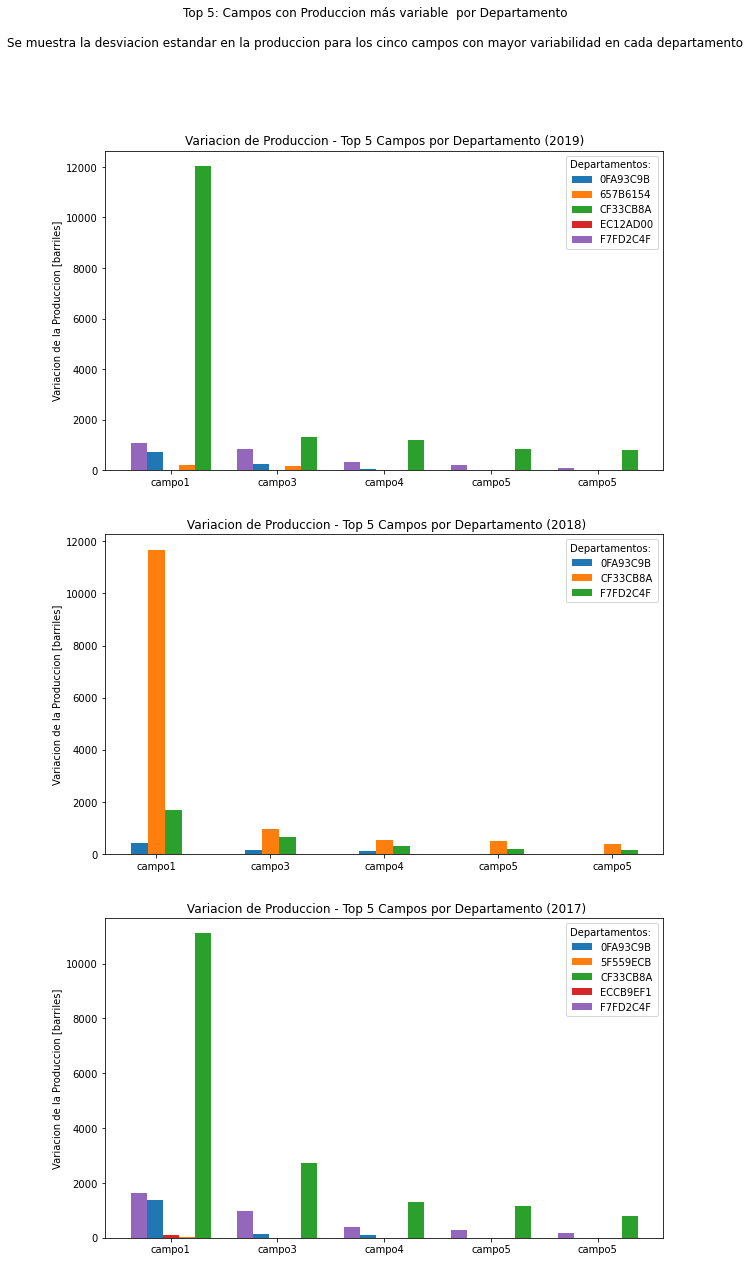

In [26]:
## Grafico: Pregunta 9 (Resumen: 2017, 2018, 2019)

x = np.array([1, 2, 3, 4, 5])
x_labels = ['campo1','campo3','campo4','campo5','campo5'] # Top5: labels de campos genericos

width = 0.15  # the width of the bars

## Crear Grafica
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,20))
fig.suptitle('Top 5: Campos con Produccion más variable  por Departamento\n\nSe muestra la desviacion estandar en la produccion para los cinco campos con mayor variabilidad en cada departamento')
plt.setp(axs, xticks = x, xticklabels=x_labels)

# Grafica: Variacion de Produccion - Top 5 Campos en 2019
rects1 = ax[0].bar(x - width, dep1_19_std, width, label= dep1_19_name)
rects2 = ax[0].bar(x + width, dep2_19_std, width, label= dep2_19_name)
rects3 = ax[0].bar(x + 2*width, dep3_19_std, width, label= dep3_19_name)
rects4 = ax[0].bar(x , dep4_19_std, width, label= dep4_19_name)
rects5 = ax[0].bar(x - 2*width, dep5_19_std, width, label= dep5_19_name)

ax[0].set_ylabel('Variacion de la Produccion [barriles]')
ax[0].set_title\
('Variacion de Produccion - Top 5 Campos por Departamento (2019)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(x_labels)
ax[0].legend(title = 'Departamentos: ')

# Grafica: Variacion de Produccion - Top 5 Campos en 2018
rects1 = ax[1].bar(x - width/1, dep1_18_std, width, label= dep1_18_name)
rects2 = ax[1].bar(x , dep2_18_std, width, label= dep2_18_name)
rects3 = ax[1].bar(x + width/1, dep3_18_std, width, label= dep3_18_name)

ax[1].set_ylabel('Variacion de la Produccion [barriles]')
ax[1].set_title\
('\n\n\n Variacion de Produccion - Top 5 Campos por Departamento (2018)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(x_labels)
ax[1].legend(title = 'Departamentos: ')

# Grafica: Variacion de Produccion - Top 5 Campos en 2017
rects1 = ax[2].bar(x - width, dep1_17_std, width, label= dep1_17_name)
rects2 = ax[2].bar(x + width, dep2_17_std, width, label= dep2_17_name)
rects3 = ax[2].bar(x + 2*width, dep3_17_std, width, label= dep3_17_name)
rects4 = ax[2].bar(x , dep4_17_std, width, label= dep4_17_name)
rects5 = ax[2].bar(x - 2*width, dep5_17_std, width, label= dep5_17_name)

ax[2].set_ylabel('Variacion de la Produccion [barriles]')
ax[2].set_title\
('\n\n\n Variacion de Produccion - Top 5 Campos por Departamento (2017)')
ax[2].set_xticks(x)
ax[2].set_xticklabels(x_labels)
ax[2].legend(title = 'Departamentos: ')


print('Grafico - Pregunta 9 (Resumen):\n')
plt.show()

## Pregunta 10

In [27]:
# ** Filtrar produccion del campo "51CBB05D" en todos los datos disponibles: de 2017 a 2019 **

query10 = df_2017_2019_blind.groupby(['campo','mes','año'],as_index = False).sum() # Produccion de 2017 a 2019 (todos los campos)
query10 = query10[query10['campo'].isin(['51cbb05d'])].groupby(['mes','año'],as_index = False).sum().sort_values('año') # Produccion por mes para el campo "51CBB05D"
query10.sort_values('mes',inplace = True) # ordenar por mes

In [28]:
# ** Ordenar los datos en tiempo (desde enero 2017 --> diciembre 2019), y calcular el Caudal de produccion por mes **

meses_orden ={'ene':31,'feb':28,'mar':31,'abr':30,'may':31,'jun':30,'jul':31,'ago':31,'sep':30,'oct':31,'nov':30,'dic':31} # Meses - dias/mes
query10['mes'] = pd.Categorical(query10['mes'], meses_orden.keys())
query10.sort_values(['año','mes'],inplace = True) # ordenar por meses: de enero --> diciembre, y por años: 2017 --> 2019
query10.reset_index(drop = True, inplace = True)
query10['dias'] = query10['mes'].map(meses_orden) # anadir columna de dias en cada mes
query10['caudal [bppd]'] = query10['produccion']/query10['dias'] #Calcular Caudal por mes

query10['mes_num'] = query10.index.values # anadir columna con meses enumerados

#datos ordenados de produccion: desde enero 2017 --> diciembre 2019
print('Datos ordenados de produccion: de enero de 2017 a diciembre de 2019:\n')
print(query10.head())
print('........................................................\n')
print(query10.tail())

Datos ordenados de produccion: de enero de 2017 a diciembre de 2019:

   mes   año   produccion  dias  caudal [bppd]  mes_num
0  ene  2017  1871.488651    31      60.370602        0
1  feb  2017  1412.303663    28      50.439417        1
2  mar  2017  1003.131949    31      32.359095        2
3  abr  2017  1017.901566    30      33.930052        3
4  may  2017   789.848893    31      25.478997        4
........................................................

    mes   año  produccion  dias  caudal [bppd]  mes_num
31  ago  2019  497.318555    31      16.042534       31
32  sep  2019  520.688133    30      17.356271       32
33  oct  2019  438.845672    31      14.156312       33
34  nov  2019  353.186216    30      11.772874       34
35  dic  2019  396.434617    31      12.788213       35


In [29]:
# Ordenar columnas: Mes, Caudal, Produccion (por mes)
datos_produccion = query10.drop(['dias','mes','año'], axis = 1) #eliminar columnas: dias, mes, año
datos_produccion = datos_produccion[['mes_num','caudal [bppd]','produccion']] # ordenar columnas

print('Campo "51CBB05D": Caudal de Produccion vs tiempo (meses):')
datos_produccion.head(15)


Campo "51CBB05D": Caudal de Produccion vs tiempo (meses):


,mes_num,caudal [bppd],produccion
0,0,60.370602,1871.488651
1,1,50.439417,1412.303663
2,2,32.359095,1003.131949
3,3,33.930052,1017.901566
4,4,25.478997,789.848893
5,5,21.536600,646.097985
6,6,31.574900,978.821890
7,7,26.979492,836.364244
8,8,26.595719,797.871564
9,9,22.689614,703.378049


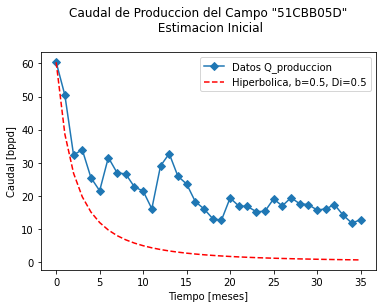

In [30]:
q0 = datos_produccion['caudal [bppd]'].values[0] # valor inicial del Caudal de produccion
b = 0.5 #(Arps, hiperbolica, b = 0.5)

# Definir Funcion de Declinacion de Produccion (Arps, Hiperbolica, b = 0.5)
def hiperbolica(t,Di):
    return q0*((1 + b*Di*t)**(-1/b))

Di_0 = 0.5 # estimacion inicial de Di

n = len(datos_produccion['mes_num']) # numer de datos de produccion
y = np.empty(n) # vector y: almacenar datos estimados

# Calculo de Caudal - Hiperbolica (estimacion inicial de Di)
for i in range(n):
    y[i]  = hiperbolica(datos_produccion['mes_num'][i],Di_0)
    
# Grafica:
plt.plot(datos_produccion['mes_num'],datos_produccion['caudal [bppd]'],marker = 'D') # Caudal (medicion) vs tiempo (meses)
plt.plot(datos_produccion['mes_num'],y,'r--') # Caudal calculado (Di inicial)
plt.legend(['Datos Q_produccion','Hiperbolica, b=0.5, Di=0.5'])
plt.xlabel('Tiempo [meses]')
plt.ylabel('Caudal [bppd]')
plt.title('Caudal de Produccion del Campo "51CBB05D"\n Estimacion Inicial\n')
plt.show()

In [31]:
## Ajuste de los datos a la curva hiperbolica - Regresion No Lineal

# Calculo de la tasa de declinacion promedio del campo "51CBB05D" (Arps, hiberbolica, b=0.5)
from scipy.optimize import curve_fit

t = datos_produccion['mes_num'].values # valores de tiempo
caudal_datos = datos_produccion['caudal [bppd]'].values # valores de Caudal de Produccion

# Regresion No Lineal: ARPS, Hiperbolica, b = 0.5
Di_techo, cov = curve_fit(hiperbolica,t,caudal_datos,Di_0)


Grafico - Pregunta 10:


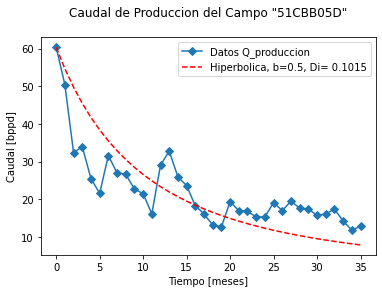

Tasa de declinacion promedio mensual Di =  0.1015 [1/mes]


In [32]:
# Calculo de Caudal de Produccion: Hiperbolica (b = 0.5, Di = 0.1015 [1/mes] )
for i in range(n):
    y[i]  = hiperbolica(datos_produccion['mes_num'][i], Di_techo)
    
# Grafica: Pregunta 10
plt.plot(datos_produccion['mes_num'],datos_produccion['caudal [bppd]'], marker = 'D') # Caudal (medicion) vs tiempo (meses)
plt.plot(datos_produccion['mes_num'],y,'r--') # Caudal calculado: Hiperbolica (b = 0.5, Di = 0.1015 [1/mes] )

plt.legend(['Datos Q_produccion','Hiperbolica, b=0.5, Di= 0.1015'])
plt.xlabel('Tiempo [meses]')
plt.ylabel('Caudal [bppd]')
plt.title('Caudal de Produccion del Campo "51CBB05D"\n')

# Respuesta 10:
print('Grafico - Pregunta 10:')
plt.show()
print('Tasa de declinacion promedio mensual Di = ', round(float(Di_techo),4),'[1/mes]')